## Pearson's correlation coefficient

The **pearson's correlation coefficient** measures the degree of dependency that a two variables has. The variables usually are:
* The x variable, which is the independent variable (we will see deeply in the linear regression topic)
* The y variable, which we want to test if it is dependent of x

How is computed?
We will use the following formula:

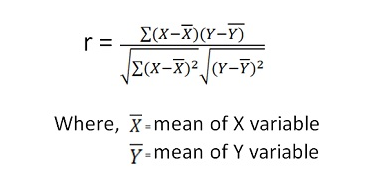

In [4]:
from IPython.display import Image #This library is used to be able to print images in the notebook
Image("resources/word-image28.png")

And also, we will look how distributions look like depending of which is the value of the correlation

Remember that the correlation does not imply causality.

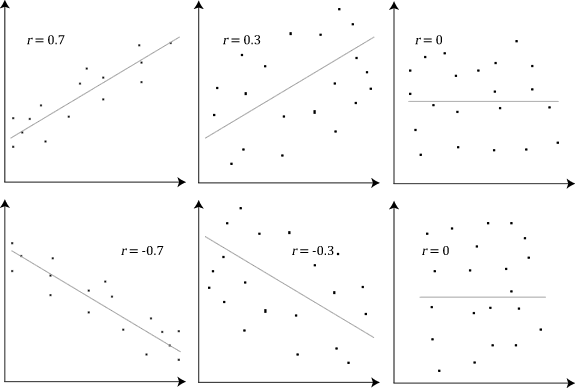

In [5]:
Image("resources/pearson-2-small.png")

We will take a look to a **practical exercise**, where the dataset that we will be using is the ads one.

This dataset has the amount spent daily in television, newspaper and radio, and the amount in sales that this day we had. So we want to know which is the **degree of dependency** between these variables.

In [6]:
import pandas as pd
data_ads = pd.read_csv("datasets/ads/Advertising.csv")
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
#To do the computation of the correlation, we will go step by step
import numpy as np

#We will start for example making the TV and Sales
data_ads["corrn"] = (data_ads["TV"]-np.mean(data_ads["TV"])*(data_ads["Sales"]-np.mean(data_ads["Sales"])))

#This will multiply the difference in each value x and y (the numerator)
data_ads["corrn"]

0      -957.635794
1       577.161456
2       711.608206
3      -506.882794
4       345.855206
          ...     
195     982.580456
196     729.791206
197     356.759456
198   -1404.080294
199     323.633956
Name: corrn, Length: 200, dtype: float64

In [13]:
#And now we will compute the denominator
data_ads["corr1"] = (data_ads["TV"]-np.mean(data_ads["TV"]))**2
data_ads["corr2"] = (data_ads["Sales"]-np.mean(data_ads["Sales"]))**2

#And now we make the square root of the both values
data_ads["corrd"] = np.sqrt(sum(data_ads["corr1"]*sum(data_ads["corr2"])))

In [17]:
#We will finally do the computation of the formula
coeff_pearson = sum(data_ads["corrn"]/data_ads["corrd"])
coeff_pearson

0.3299128453480603

### Why do not create a fomula?

In [18]:
#We can define a formula for computing the pearson coefficient
def coeff_pearson(df, x, y):
    df["corrn"] = (df[x]-np.mean(df[x])*(df[y]-np.mean(df[y])))
    df["corr1"] = (df[x]-np.mean(df[x]))**2
    df["corr2"] = (df[y]-np.mean(df[y]))**2
    df["corrd"] = np.sqrt(sum(df["corr1"]*sum(df["corr2"])))
    coeff_pearson = sum(data_ads["corrn"]/data_ads["corrd"])
    return coeff_pear

In [20]:
#Does it work?
coeff_pearson(data_ads, "TV", "Sales")